In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('./Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df1 = df.copy()
df1.columns = [("column" + str(i)) for i in range(22)]
df1

,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9,...,column12,column13,column14,column15,column16,column17,column18,column19,column20,column21
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Xử Lý Data

In [5]:
df1.describe()

,column1,column3,column4,column5,column6,column7,column8,column9,column10,column11,column12,column13,column14,column15,column16,column17,column18,column19,column20,column21
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
df2 = df1.copy()

In [7]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

df2_scale = df2.drop(['column0', 'column2', 'column3'], axis = 1)
columns = df2_scale.columns
scale.fit(df2_scale)
df2_scale = scale.transform(df2_scale)
df2_scale = pd.DataFrame(df2_scale, columns = columns)
df2_scale

,column1,column4,column5,column6,column7,column8,column9,column10,column11,column12,column13,column14,column15,column16,column17,column18,column19,column20,column21
0,1.000000,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0.933333,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,0.866667,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,0.800000,0.375346,0.038333,0.000000,0.004014,0.673469,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.000000,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,0.733333,0.379501,0.039444,0.000000,0.000364,0.683673,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.000000,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.266667,1.000000,0.015000,0.243561,0.000000,0.683673,0.000146,0.302433,0.0168,0.666667,0.392339,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444
2934,0.200000,0.988920,0.014444,0.226764,0.000000,0.061224,0.004703,0.297798,0.0164,0.041667,0.356936,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937
2935,0.133333,0.099723,0.013889,0.247480,0.000000,0.734694,0.001433,0.293163,0.0160,0.729167,0.357516,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092
2936,0.066667,0.948753,0.013889,0.095745,0.000000,0.765306,0.002493,0.288528,0.0156,0.760417,0.336042,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430


In [8]:
df2[columns] = df2_scale[columns]
df2

,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9,...,column12,column13,column14,column15,column16,column17,column18,column19,column20,column21
0,Afghanistan,1.000000,Developing,65.0,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,...,0.031250,0.452118,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,Afghanistan,0.933333,Developing,59.9,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,...,0.572917,0.453279,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,Afghanistan,0.866667,Developing,59.9,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,...,0.614583,0.450377,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,Afghanistan,0.800000,Developing,59.5,0.375346,0.038333,0.000000,0.004014,0.673469,0.013135,...,0.666667,0.473012,0.670103,0.000000,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,Afghanistan,0.733333,Developing,59.2,0.379501,0.039444,0.000000,0.000364,0.683673,0.014200,...,0.677083,0.435287,0.680412,0.000000,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,0.266667,Developing,44.3,1.000000,0.015000,0.243561,0.000000,0.683673,0.000146,...,0.666667,0.392339,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444
2934,Zimbabwe,0.200000,Developing,44.5,0.988920,0.014444,0.226764,0.000000,0.061224,0.004703,...,0.041667,0.356936,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937
2935,Zimbabwe,0.133333,Developing,44.8,0.099723,0.013889,0.247480,0.000000,0.734694,0.001433,...,0.729167,0.357516,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092
2936,Zimbabwe,0.066667,Developing,45.3,0.948753,0.013889,0.095745,0.000000,0.765306,0.002493,...,0.760417,0.336042,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430


In [9]:
df3 = pd.get_dummies(df2, columns=['column2'])
df3

,column0,column1,column3,column4,column5,column6,column7,column8,column9,column10,...,column14,column15,column16,column17,column18,column19,column20,column21,column2_Developed,column2_Developing
0,Afghanistan,1.000000,65.0,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,0.209733,...,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923,0,1
1,Afghanistan,0.933333,59.9,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,0.203940,...,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092,0,1
2,Afghanistan,0.866667,59.9,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,0.198146,...,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261,0,1
3,Afghanistan,0.800000,59.5,0.375346,0.038333,0.000000,0.004014,0.673469,0.013135,0.192352,...,0.670103,0.000000,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430,0,1
4,Afghanistan,0.733333,59.2,0.379501,0.039444,0.000000,0.000364,0.683673,0.014200,0.187717,...,0.680412,0.000000,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,0.266667,44.3,1.000000,0.015000,0.243561,0.000000,0.683673,0.000146,0.302433,...,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444,0,1
2934,Zimbabwe,0.200000,44.5,0.988920,0.014444,0.226764,0.000000,0.061224,0.004703,0.297798,...,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937,0,1
2935,Zimbabwe,0.133333,44.8,0.099723,0.013889,0.247480,0.000000,0.734694,0.001433,0.293163,...,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092,0,1
2936,Zimbabwe,0.066667,45.3,0.948753,0.013889,0.095745,0.000000,0.765306,0.002493,0.288528,...,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430,0,1


In [10]:
from category_encoders import BinaryEncoder

encode = BinaryEncoder()
df3_0 = encode.fit_transform(df3.column0)
df3.drop(['column0'], axis =1, inplace = True)
df3 = pd.concat([df3, df3_0], axis = 1)
df3


,column1,column3,column4,column5,column6,column7,column8,column9,column10,column11,...,column2_Developed,column2_Developing,column0_0,column0_1,column0_2,column0_3,column0_4,column0_5,column0_6,column0_7
0,1.000000,65.0,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,0.209733,0.0332,...,0,1,0,0,0,0,0,0,0,1
1,0.933333,59.9,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,0.203940,0.0344,...,0,1,0,0,0,0,0,0,0,1
2,0.866667,59.9,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,0.198146,0.0356,...,0,1,0,0,0,0,0,0,0,1
3,0.800000,59.5,0.375346,0.038333,0.000000,0.004014,0.673469,0.013135,0.192352,0.0372,...,0,1,0,0,0,0,0,0,0,1
4,0.733333,59.2,0.379501,0.039444,0.000000,0.000364,0.683673,0.014200,0.187717,0.0388,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.266667,44.3,1.000000,0.015000,0.243561,0.000000,0.683673,0.000146,0.302433,0.0168,...,0,1,1,1,0,0,0,0,0,1
2934,0.200000,44.5,0.988920,0.014444,0.226764,0.000000,0.061224,0.004703,0.297798,0.0164,...,0,1,1,1,0,0,0,0,0,1
2935,0.133333,44.8,0.099723,0.013889,0.247480,0.000000,0.734694,0.001433,0.293163,0.0160,...,0,1,1,1,0,0,0,0,0,1
2936,0.066667,45.3,0.948753,0.013889,0.095745,0.000000,0.765306,0.002493,0.288528,0.0156,...,0,1,1,1,0,0,0,0,0,1


In [11]:
df4 = df1.copy()

In [12]:
df5 = pd.get_dummies(df4, columns=['column2'])
df5

,column0,column1,column3,column4,column5,column6,column7,column8,column9,column10,...,column14,column15,column16,column17,column18,column19,column20,column21,column2_Developed,column2_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,Zimbabwe,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,Zimbabwe,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,Zimbabwe,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [14]:
from category_encoders import BinaryEncoder

encode = BinaryEncoder()
df5_0 = encode.fit_transform(df5.column0)
df5.drop(['column0'], axis =1, inplace = True)
df5 = pd.concat([df5, df5_0], axis = 1)
df5

,column1,column3,column4,column5,column6,column7,column8,column9,column10,column11,...,column2_Developed,column2_Developing,column0_0,column0_1,column0_2,column0_3,column0_4,column0_5,column0_6,column0_7
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,1,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,1,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,1,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,1,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,0,1,1,1,0,0,0,0,0,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,0,1,1,1,0,0,0,0,0,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,0,1,1,1,0,0,0,0,0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,0,1,1,1,0,0,0,0,0,1


# OUTLIERS IQR

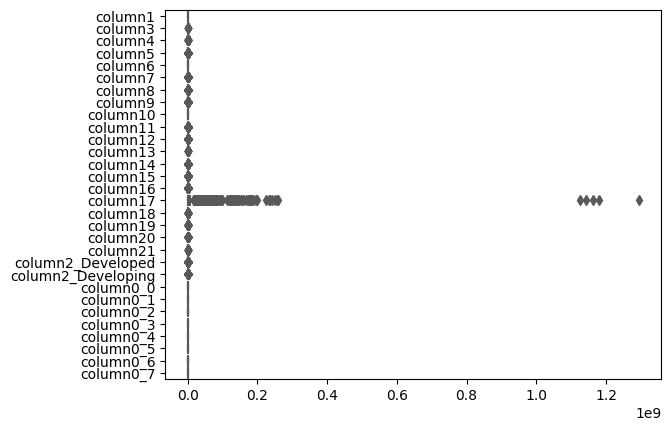

In [16]:
fig, axs = plt.subplots()
sns.boxplot(data=df5,palette="Set2",orient='h')
plt.show()

In [17]:
df5.column3.describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: column3, dtype: float64

In [22]:
q25, q75 = np.quantile(df5['column3'], 0.25), np.quantile(df5['column3'], 0.75)
q25, q75

(nan, nan)

In [27]:
df_iqr = df5.copy()
for i in df5.columns:
    q25, q75 = np.quantile(df5[i], 0.25), np.quantile(df5[i], 0.75)
    iqr = q75 - q25
    lower, upper = q25 - 1.5*iqr, q75 + 1.5*iqr
    df_iqr = df_iqr[(df5[i] < upper) & (df5[i] > lower)]
    print(i)
    print(f"Lower_tail: {lower}")
    print(f"Upper_tail: {upper}")

column1
Lower_tail: 1992.0
Upper_tail: 2024.0
column3
Lower_tail: nan
Upper_tail: nan
column4
Lower_tail: nan
Upper_tail: nan
column5
Lower_tail: -33.0
Upper_tail: 55.0
column6
Lower_tail: nan
Upper_tail: nan
column7
Lower_tail: -650.587860061875
Upper_tail: 1096.807346997125
column8
Lower_tail: nan
Upper_tail: nan
column9
Lower_tail: -540.375
Upper_tail: 900.625
column10
Lower_tail: nan
Upper_tail: nan
column11
Lower_tail: -42.0
Upper_tail: 70.0
column12
Lower_tail: nan
Upper_tail: nan
column13
Lower_tail: nan
Upper_tail: nan
column14
Lower_tail: nan
Upper_tail: nan
column15
Lower_tail: -0.9500000000000001
Upper_tail: 1.85
column16
Lower_tail: nan
Upper_tail: nan
column17
Lower_tail: nan
Upper_tail: nan
column18
Lower_tail: nan
Upper_tail: nan
column19
Lower_tail: nan
Upper_tail: nan
column20
Lower_tail: nan
Upper_tail: nan
column21
Lower_tail: nan
Upper_tail: nan
column2_Developed
Lower_tail: 0.0
Upper_tail: 0.0
column2_Developing
Lower_tail: 1.0
Upper_tail: 1.0
column0_0
Lower_tail:

C:\Users\anhdu\AppData\Local\Temp\ipykernel_19028\1277500264.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr = df_iqr[(df5[i] < upper) & (df5[i] > lower)]


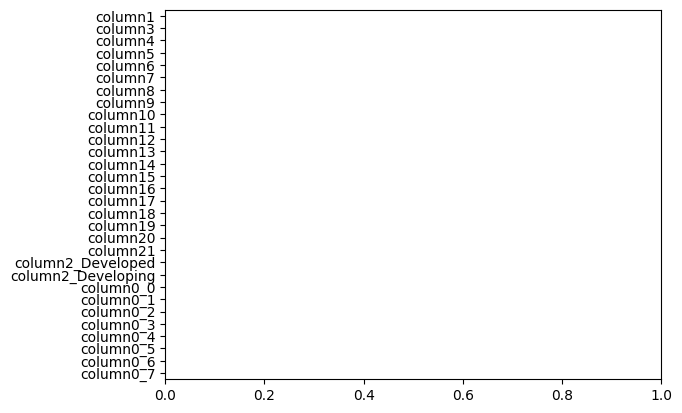

In [28]:
fig, axs = plt.subplots()
sns.boxplot(data=df_iqr,palette="Set2",orient='h')
plt.show()

In [32]:
print(df3.isna().sum()[df3.isna().sum() > 0])
columns_nan = df3.columns[df3.isna().sum() > 0]
columns_nan

column3      10
column4      10
column6     194
column8     553
column10     34
column12     19
column13    226
column14     19
column16    448
column17    652
column18     34
column19     34
column20    167
column21    163
dtype: int64


Index(['column3', 'column4', 'column6', 'column8', 'column10', 'column12',
       'column13', 'column14', 'column16', 'column17', 'column18', 'column19',
       'column20', 'column21'],
      dtype='object')

In [34]:
df_nan = df3.loc[:,columns_nan]
df_nan

,column3,column4,column6,column8,column10,column12,column13,column14,column16,column17,column18,column19,column20,column21
0,65.0,0.362881,0.000000,0.653061,0.209733,0.031250,0.452118,0.649485,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,59.9,0.373961,0.000000,0.622449,0.203940,0.572917,0.453279,0.618557,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,59.9,0.369806,0.000000,0.642857,0.198146,0.614583,0.450377,0.639175,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,59.5,0.375346,0.000000,0.673469,0.192352,0.666667,0.473012,0.670103,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,59.2,0.379501,0.000000,0.683673,0.187717,0.677083,0.435287,0.680412,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,1.000000,0.243561,0.683673,0.302433,0.666667,0.392339,0.649485,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444
2934,44.5,0.988920,0.226764,0.061224,0.297798,0.041667,0.356936,0.680412,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937
2935,44.8,0.099723,0.247480,0.734694,0.293163,0.729167,0.357516,0.711340,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092
2936,45.3,0.948753,0.095745,0.765306,0.288528,0.760417,0.336042,0.752577,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430


In [36]:
for i in df_nan.columns:
    df_nan[i].fillna(df_nan[i].mean(), inplace=True)
df_nan.isna().sum()

column3     0
column4     0
column6     0
column8     0
column10    0
column12    0
column13    0
column14    0
column16    0
column17    0
column18    0
column19    0
column20    0
column21    0
dtype: int64

In [37]:
df4 = df3.copy()
df4[columns_nan] = df_nan[columns_nan]
df4

,column1,column3,column4,column5,column6,column7,column8,column9,column10,column11,...,column2_Developed,column2_Developing,column0_0,column0_1,column0_2,column0_3,column0_4,column0_5,column0_6,column0_7
0,1.000000,65.0,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,0.209733,0.0332,...,0,1,0,0,0,0,0,0,0,1
1,0.933333,59.9,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,0.203940,0.0344,...,0,1,0,0,0,0,0,0,0,1
2,0.866667,59.9,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,0.198146,0.0356,...,0,1,0,0,0,0,0,0,0,1
3,0.800000,59.5,0.375346,0.038333,0.000000,0.004014,0.673469,0.013135,0.192352,0.0372,...,0,1,0,0,0,0,0,0,0,1
4,0.733333,59.2,0.379501,0.039444,0.000000,0.000364,0.683673,0.014200,0.187717,0.0388,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.266667,44.3,1.000000,0.015000,0.243561,0.000000,0.683673,0.000146,0.302433,0.0168,...,0,1,1,1,0,0,0,0,0,1
2934,0.200000,44.5,0.988920,0.014444,0.226764,0.000000,0.061224,0.004703,0.297798,0.0164,...,0,1,1,1,0,0,0,0,0,1
2935,0.133333,44.8,0.099723,0.013889,0.247480,0.000000,0.734694,0.001433,0.293163,0.0160,...,0,1,1,1,0,0,0,0,0,1
2936,0.066667,45.3,0.948753,0.013889,0.095745,0.000000,0.765306,0.002493,0.288528,0.0156,...,0,1,1,1,0,0,0,0,0,1


In [38]:
df4.isna().sum()

column1               0
column3               0
column4               0
column5               0
column6               0
column7               0
column8               0
column9               0
column10              0
column11              0
column12              0
column13              0
column14              0
column15              0
column16              0
column17              0
column18              0
column19              0
column20              0
column21              0
column2_Developed     0
column2_Developing    0
column0_0             0
column0_1             0
column0_2             0
column0_3             0
column0_4             0
column0_5             0
column0_6             0
column0_7             0
dtype: int64

In [40]:
df6 = df5.copy()

In [41]:
columns1_nan = df5.columns[df5.isna().sum() > 0]
df1_nan = df5.loc[:,columns1_nan]
df1_nan

,column3,column4,column6,column8,column10,column12,column13,column14,column16,column17,column18,column19,column20,column21
0,65.0,263.0,0.01,65.0,19.1,6.0,8.16,65.0,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,0.01,62.0,18.6,58.0,8.18,62.0,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,0.01,64.0,18.1,62.0,8.13,64.0,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,0.01,67.0,17.6,67.0,8.52,67.0,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,0.01,68.0,17.2,68.0,7.87,68.0,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,4.36,68.0,27.1,67.0,7.13,65.0,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,4.06,7.0,26.7,7.0,6.52,68.0,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,4.43,73.0,26.3,73.0,6.53,71.0,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,1.72,76.0,25.9,76.0,6.16,75.0,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [42]:
for i in df1_nan.columns:
    df1_nan[i].fillna(df1_nan[i].mean(), inplace=True)
df1_nan.isna().sum()

column3     0
column4     0
column6     0
column8     0
column10    0
column12    0
column13    0
column14    0
column16    0
column17    0
column18    0
column19    0
column20    0
column21    0
dtype: int64

In [43]:
df6[columns1_nan] = df1_nan[columns1_nan]
df6

,column1,column3,column4,column5,column6,column7,column8,column9,column10,column11,...,column2_Developed,column2_Developing,column0_0,column0_1,column0_2,column0_3,column0_4,column0_5,column0_6,column0_7
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,1,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,1,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,1,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,1,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,0,1,1,1,0,0,0,0,0,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,0,1,1,1,0,0,0,0,0,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,0,1,1,1,0,0,0,0,0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,0,1,1,1,0,0,0,0,0,1


In [44]:
df6.isna().sum()

column1               0
column3               0
column4               0
column5               0
column6               0
column7               0
column8               0
column9               0
column10              0
column11              0
column12              0
column13              0
column14              0
column15              0
column16              0
column17              0
column18              0
column19              0
column20              0
column21              0
column2_Developed     0
column2_Developing    0
column0_0             0
column0_1             0
column0_2             0
column0_3             0
column0_4             0
column0_5             0
column0_6             0
column0_7             0
dtype: int64

# classification

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
x = df4.drop(['column3'], axis=1)
y = df4['column3']
x.shape, y.shape

((2938, 29), (2938,))

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2350, 29), (2350,), (588, 29), (588,))

In [48]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [49]:
print(f"MSE: {mean_squared_error(y_test, pred)}\nMAE: {mean_absolute_error(y_test, pred)}\nR2: {r2_score(y_test, pred)}")

MSE: 15.062935562220016
MAE: 2.854039695260571
R2: 0.8261339248869972


In [50]:
x1 = df6.drop(['column3'], axis=1)
y1 = df6['column3']
x1.shape, y1.shape

((2938, 29), (2938,))

In [51]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42,shuffle=True)
x1_train.shape, y1_train.shape, x1_test.shape, y1_test.shape

((2350, 29), (2350,), (588, 29), (588,))

In [52]:
model1 = LinearRegression()
model1.fit(x1_train, y1_train)
pred1 = model1.predict(x1_test)

In [53]:
print(f"MSE: {mean_squared_error(y1_test, pred1)}\nMAE: {mean_absolute_error(y1_test, pred1)}\nR2: {r2_score(y1_test, pred1)}")

MSE: 15.062935562383023
MAE: 2.854039695306894
R2: 0.8261339248851157


In [54]:
x1_test.index = [i for i in range(588)]
x_c5 = x1_test.loc[0:30,:]
year = pd.DataFrame([i for i in range(2000,2031)])
x_c5['column1'] = year
x_c5

C:\Users\anhdu\AppData\Local\Temp\ipykernel_19028\2288533278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_c5['column1'] = year


,column1,column4,column5,column6,column7,column8,column9,column10,column11,column12,...,column2_Developed,column2_Developing,column0_0,column0_1,column0_2,column0_3,column0_4,column0_5,column0_6,column0_7
0,2000,123.0,8,0.970000,122.652333,83.000000,517,48.5,10,83.0,...,0,1,1,0,1,0,1,0,0,0
1,2001,113.0,0,11.830000,1555.651986,80.940461,1,58.1,0,96.0,...,1,0,0,0,1,0,1,0,1,0
2,2002,125.0,0,4.980000,678.518894,9.000000,0,57.2,0,92.0,...,0,1,0,1,1,1,0,0,0,1
3,2003,7.0,0,1.570000,367.255674,98.000000,46,62.9,0,98.0,...,0,1,0,0,0,0,1,1,0,0
4,2004,428.0,77,1.510000,0.681686,80.940461,21002,14.4,121,8.0,...,0,1,0,1,0,1,1,0,0,0
5,2005,394.0,46,0.450000,49.091982,17.000000,63,16.4,80,3.0,...,0,1,0,0,1,0,0,0,1,0
6,2006,24.0,0,0.900000,25.311560,83.000000,0,42.1,0,9.0,...,0,1,1,0,0,1,1,1,0,1
7,2007,138.0,11,4.850000,58.498974,93.000000,1,5.8,14,93.0,...,0,1,1,0,0,0,0,1,0,1
8,2008,89.0,0,4.030000,732.866249,89.000000,3000,55.3,0,86.0,...,0,1,0,0,0,1,0,1,0,1
9,2009,438.0,2,5.200000,735.709098,91.000000,0,3.2,3,85.0,...,0,1,1,0,1,0,0,1,0,1


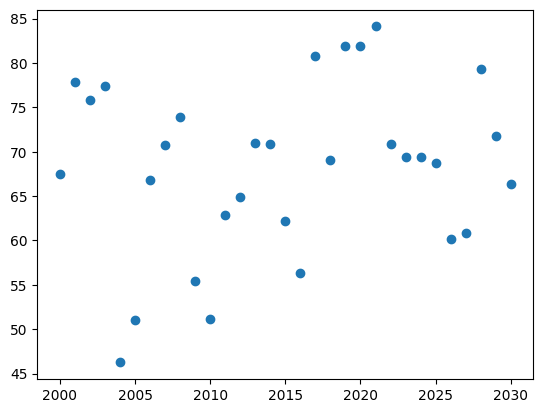

In [55]:
pred2 = model1.predict(x_c5)
plt.scatter(x_c5.column1, pred2)
plt.show()

# Cross

In [56]:
from sklearn.model_selection import KFold, cross_validate

In [57]:
model = LinearRegression()

scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_resutls = cross_validate(model, x, y, cv=kf, n_jobs=-1, scoring=scoring)

cv_resutls

{'fit_time': array([0.00891042, 0.00990891, 0.00889826, 0.01092052, 0.00990891]),
 'score_time': array([0.0040338 , 0.00412083, 0.00605297, 0.00310922, 0.00504541]),
 'test_neg_mean_squared_error': array([-15.06293556, -16.5479457 , -16.80202731, -17.80907261,
        -15.88524474]),
 'test_neg_mean_absolute_error': array([-2.8540397 , -3.0463901 , -3.18544596, -3.08663918, -2.99150938]),
 'test_r2': array([0.82613392, 0.82859413, 0.8185095 , 0.79243206, 0.82105804])}

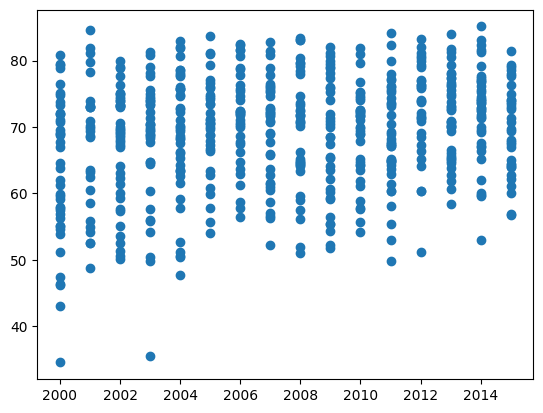

In [58]:
plt.scatter(x1_test.column1, pred)
plt.show()